## Installing and Importing Libraries

In [7]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

## Authentication fot Twitter API

In [8]:
import Secret_Key

consumerKey = Secret_Key.consumerKey
consumerSecret = Secret_Key.consumerSecret
accessToken = Secret_Key.accessToken
accessTokenSecret = Secret_Key.accessTokenSecret
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

## Getting Tweets With Keyword or Hashtag

In [9]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets , q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
 
for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: covid
Please enter how many tweets to analyze: 1000


### Number of Tweets (Total, Positive, Negative, Neutral)

In [10]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  276
negative number:  281
neutral number:  443


In [11]:
tweet_list

,0
0,"RT @grobic1sx: Señora Cami, cómo está su conci..."
1,RT @FaivreAnna1: Le diable a encore attrapé Co...
2,@LenoreO43076674 Thank you! Family of 5 with 4...
3,RT @babriis: Ontem eu tomei minha 4 dose da va...
4,"RT @DrEliDavid: “When people are vaccinated, t..."
...,...
995,RT @sandibachom: #LoudermilkLied He said he di...
996,RT @JasBell1123: Sons PCR test results are bac...
997,RT @YouHodler: The #Crypto Fear and Greed inde...
998,@ArtValley818_ I’d be damned if my baby was a ...


## Creating PieCart

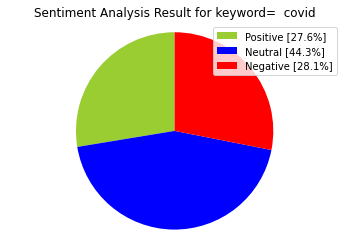

In [12]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

## Cleaning Tweets to Analyse Sentiment

In [13]:
tweet_list.drop_duplicates(inplace = True)

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"RT @grobic1sx: Señora Cami, cómo está su conci...","RT @grobic1sx: Señora Cami, cómo está su conci..."
1,RT @FaivreAnna1: Le diable a encore attrapé Co...,RT @FaivreAnna1: Le diable a encore attrapé Co...
2,@LenoreO43076674 Thank you! Family of 5 with 4...,@LenoreO43076674 Thank you! Family of 5 with 4...
3,RT @babriis: Ontem eu tomei minha 4 dose da va...,RT @babriis: Ontem eu tomei minha 4 dose da va...
4,"RT @DrEliDavid: “When people are vaccinated, t...","RT @DrEliDavid: “When people are vaccinated, t..."
...,...,...
991,"@Theresa_Chapple 2/ed. re: how to buy, store, ...","@Theresa_Chapple 2/ed. re: how to buy, store, ..."
993,"@seattletimes They told us 95% efficacy, Pfize...","@seattletimes They told us 95% efficacy, Pfize..."
994,RT @MMendlowPhD: I genuinely don’t get the “we...,RT @MMendlowPhD: I genuinely don’t get the “we...
997,RT @YouHodler: The #Crypto Fear and Greed inde...,RT @YouHodler: The #Crypto Fear and Greed inde...


In [14]:
tweet_list

,0,text
0,"RT @grobic1sx: Señora Cami, cómo está su conci...","RT @grobic1sx: Señora Cami, cómo está su conci..."
1,RT @FaivreAnna1: Le diable a encore attrapé Co...,RT @FaivreAnna1: Le diable a encore attrapé Co...
2,@LenoreO43076674 Thank you! Family of 5 with 4...,@LenoreO43076674 Thank you! Family of 5 with 4...
3,RT @babriis: Ontem eu tomei minha 4 dose da va...,RT @babriis: Ontem eu tomei minha 4 dose da va...
4,"RT @DrEliDavid: “When people are vaccinated, t...","RT @DrEliDavid: “When people are vaccinated, t..."
...,...,...
991,"@Theresa_Chapple 2/ed. re: how to buy, store, ...","@Theresa_Chapple 2/ed. re: how to buy, store, ..."
993,"@seattletimes They told us 95% efficacy, Pfize...","@seattletimes They told us 95% efficacy, Pfize..."
994,RT @MMendlowPhD: I genuinely don’t get the “we...,RT @MMendlowPhD: I genuinely don’t get the “we...
997,RT @YouHodler: The #Crypto Fear and Greed inde...,RT @YouHodler: The #Crypto Fear and Greed inde...


## Cleaning Text (RT, Punctuation etc)

In [15]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @grobic1sx: Señora Cami, cómo está su conci...",se ora cami c mo est su conciencia sabe cu...
1,RT @FaivreAnna1: Le diable a encore attrapé Co...,le diable a encore attrap covid enti re...
2,@LenoreO43076674 Thank you! Family of 5 with 4...,thank you family of 5 with 4 current isolat...
3,RT @babriis: Ontem eu tomei minha 4 dose da va...,ontem eu tomei minha 4 dose da vacina contra ...
4,"RT @DrEliDavid: “When people are vaccinated, t...",when people are vaccinated they can feel sa...
5,"RT @chrismartenson: Hey, MSN, does Bill Gates ...",hey msn does bill gates know you published ...
6,@emm__t_ Also everyone obviously WANTS COVID s...,t also everyone obviously wants covid so bad
7,RT @PanickedFoodie: A gentle reminder that if ...,a gentle reminder that if you are doing every...
8,RT @alexs12500: Efficacité du pseudo vaccin Pf...,efficacit du pseudo vaccin pfizer de 370...
9,RT @MuellerSheWrote: Let’s game out the possib...,let s game out the possibility that loudermil...


## Sentiment Analyse

In [16]:
# Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @grobic1sx: Señora Cami, cómo está su conci...",se ora cami c mo est su conciencia sabe cu...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @FaivreAnna1: Le diable a encore attrapé Co...,le diable a encore attrap covid enti re...,0.000000,0.000000,positive,0.000,0.863,0.137,0.4019
2,@LenoreO43076674 Thank you! Family of 5 with 4...,thank you family of 5 with 4 current isolat...,-0.086111,0.458333,positive,0.000,0.683,0.317,0.6705
3,RT @babriis: Ontem eu tomei minha 4 dose da va...,ontem eu tomei minha 4 dose da vacina contra ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,"RT @DrEliDavid: “When people are vaccinated, t...",when people are vaccinated they can feel sa...,0.363636,0.522727,positive,0.116,0.650,0.235,0.5106
5,"RT @chrismartenson: Hey, MSN, does Bill Gates ...",hey msn does bill gates know you published ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,@emm__t_ Also everyone obviously WANTS COVID s...,t also everyone obviously wants covid so bad,-0.250000,0.383333,negative,0.428,0.572,0.000,-0.6696
7,RT @PanickedFoodie: A gentle reminder that if ...,a gentle reminder that if you are doing every...,0.200000,0.800000,positive,0.095,0.779,0.126,0.1779
8,RT @alexs12500: Efficacité du pseudo vaccin Pf...,efficacit du pseudo vaccin pfizer de 370...,0.000000,0.000000,negative,0.156,0.844,0.000,-0.5423
9,RT @MuellerSheWrote: Let’s game out the possib...,let s game out the possibility that loudermil...,-0.400000,0.400000,positive,0.000,0.870,0.130,0.3400


In [17]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"] 

In [18]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [19]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,322,43.45
negative,224,30.23
positive,195,26.32


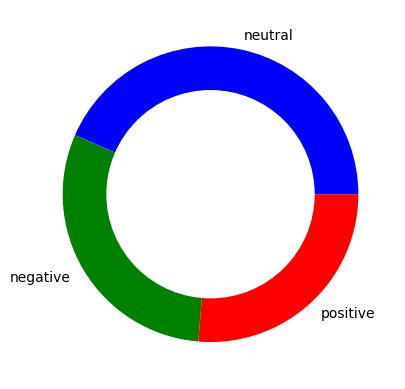

In [20]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,"sentiment")
names= piechart.index
size=piechart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['blue','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Function to Create Wordcloud

In [21]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


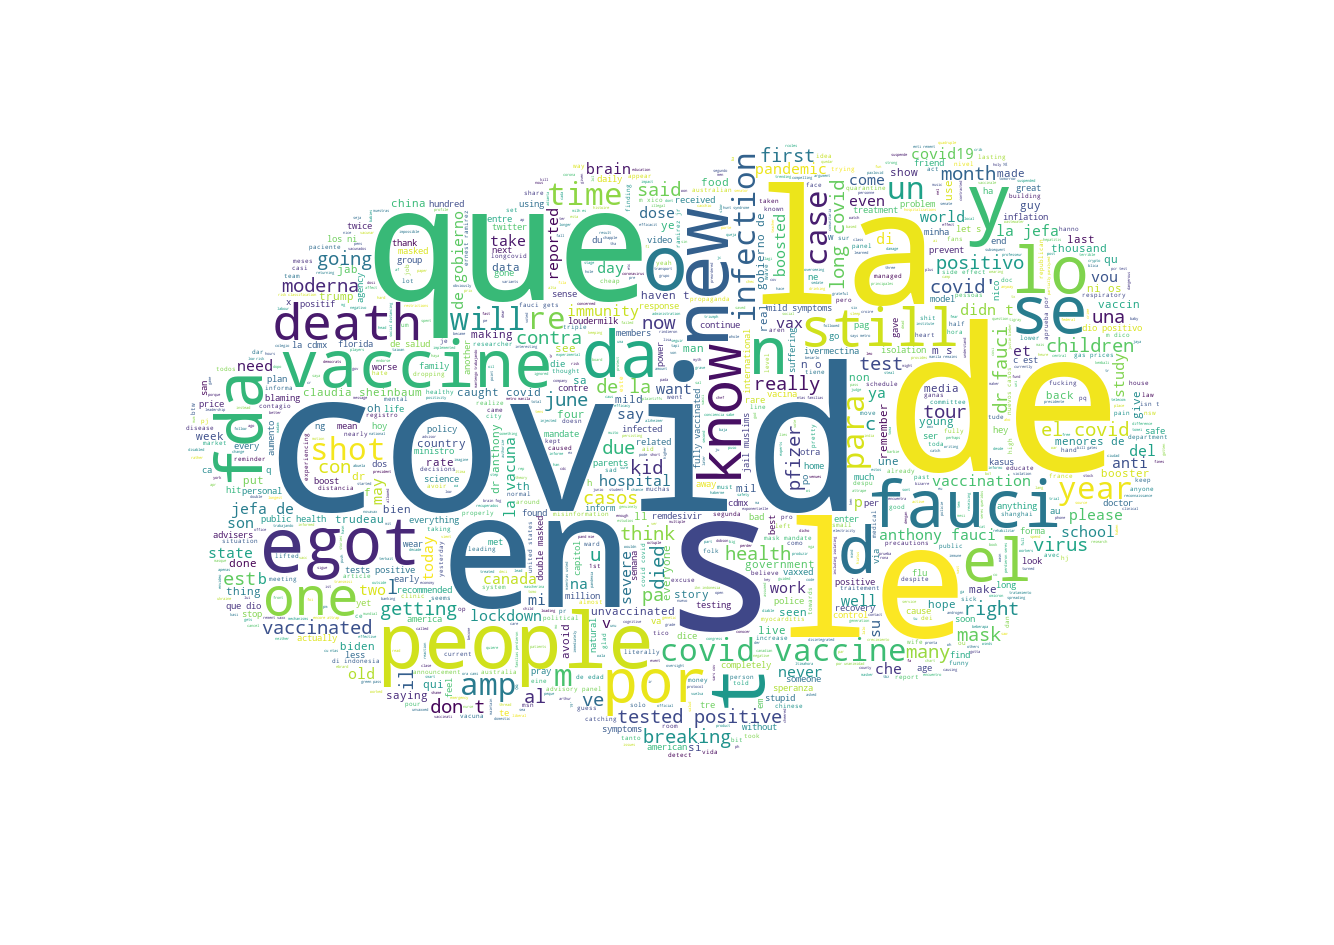

In [22]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


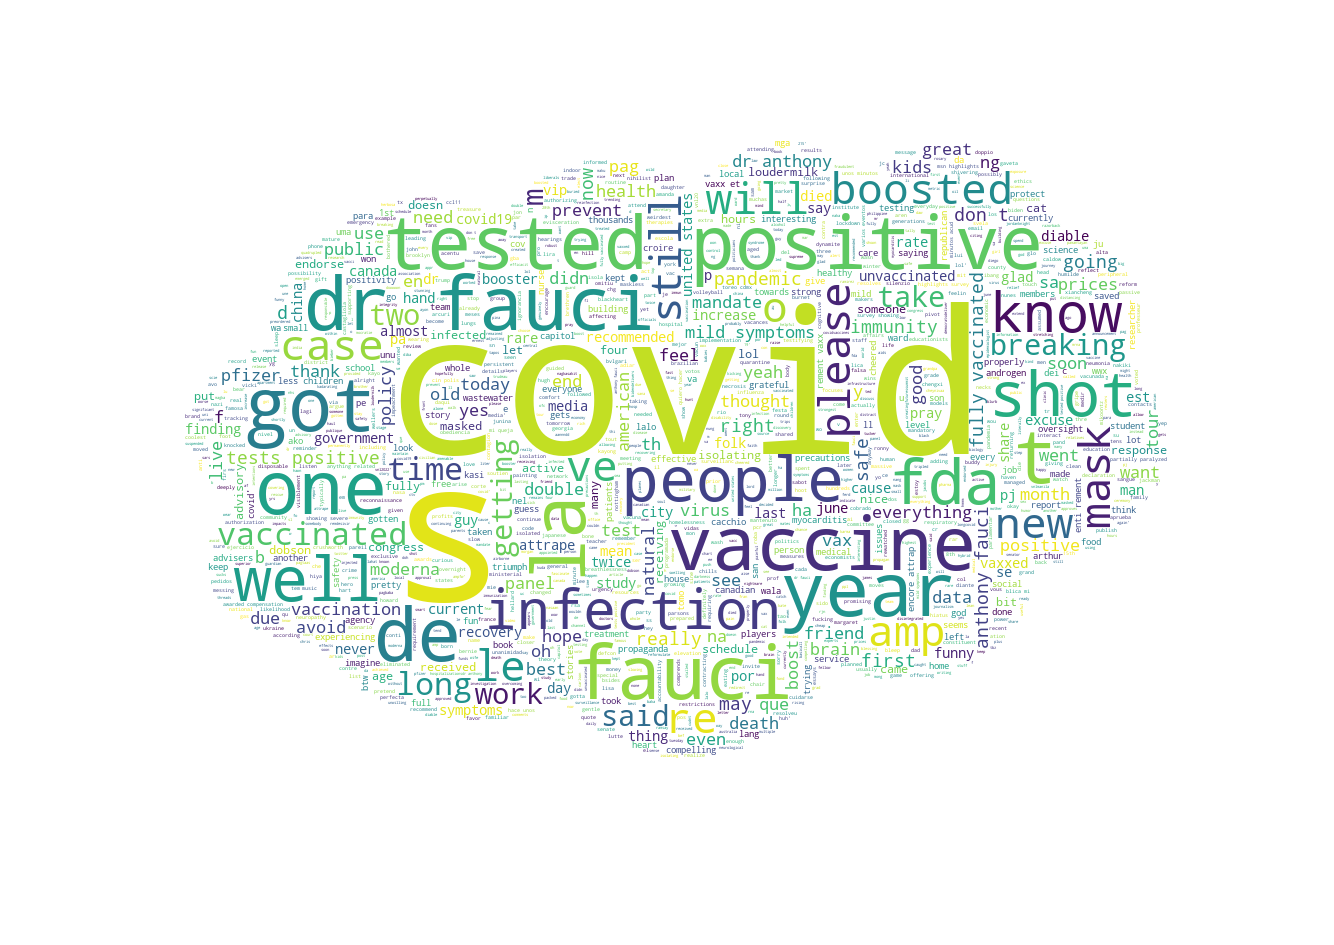

In [23]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


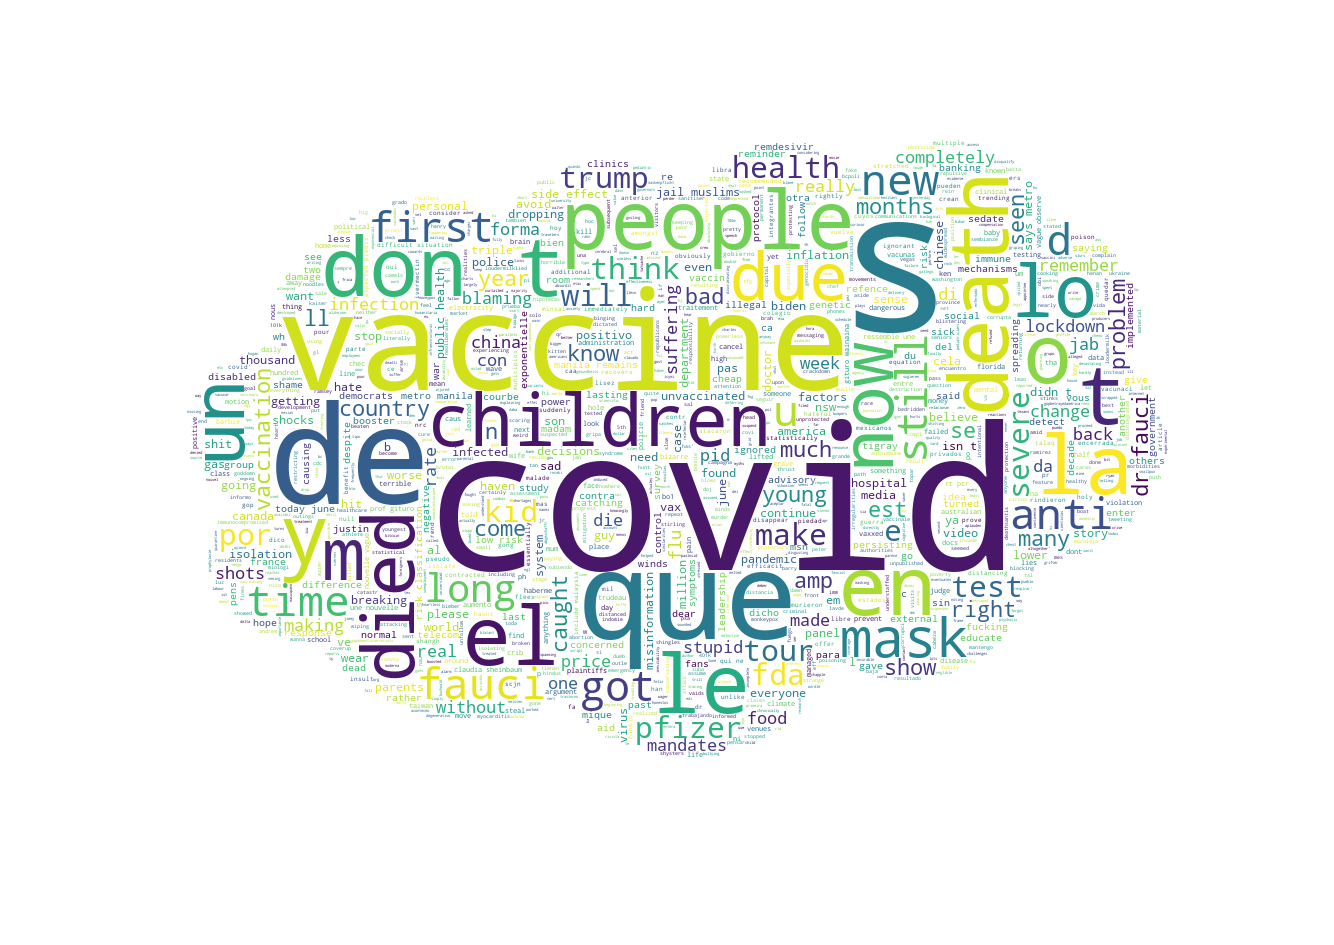

In [24]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)